# EDA and Creation of Model Data

## Overview: Explora data, test model types


---
## Project Workflow:
1. **Step 1: Install and Import Necessary Libraries**
2. **Step 2: Load Data**
3. **Step 3: Exploration**
4. **Step 4: Post-EDA Cleaning**
5. **Step 5: Whole Model Data**
6. **Step 6: 2-Model Data**


# Step 1: Install and Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline






# Step 2: Load CIC and IP Datasets

In [2]:
file_path = r"data/CIC_Camera_data.csv"

traffic_data = pd.read_csv(file_path)

In [3]:

file_path = r"data/IP_data.csv"

IP_data = pd.read_csv(file_path)

# Step 3: Exploration

## Check Packaging

In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76908 entries, 0 to 76907
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stream                                 76908 non-null  int64  
 1   user_agent                             76908 non-null  object 
 2   src_mac                                76908 non-null  object 
 3   dst_mac                                76908 non-null  object 
 4   dst_ip                                 76908 non-null  object 
 5   dst_port                               76908 non-null  int64  
 6   time_since_previously_displayed_frame  76908 non-null  float64
 7   inter_arrival_time                     76908 non-null  float64
 8   eth_size                               76908 non-null  int64  
 9   payload_length                         76908 non-null  int64  
 10  l4_tcp                                 76908 non-null  int64  
 11  l4

In [5]:
traffic_data.sample(5)

,stream,user_agent,src_mac,dst_mac,dst_ip,dst_port,time_since_previously_displayed_frame,inter_arrival_time,eth_size,payload_length,...,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,channel_10_count,channel_10_mean,channel_10_var,traffic_type
50213,978,none,Amazon Echo Show,3c:18:a0:41:c3:a0,3.223.181.245,443,0.000001,4028.244126,66,0,...,26.0,1129.615385,1.382762e+06,55.0,579.563636,9.259773e+05,26.0,1129.615385,1.382762e+06,BN
34621,27,none,Amazon Echo Show,Amazon Echo Dot 2,192.168.137.58,55444,0.036877,1487.212466,60,16,...,11.0,63.636364,4.685455e+01,14.0,215.857143,5.353398e+04,13.0,140.461538,4.135294e+04,BN
60,0,none,Nest Indoor Camera,3c:18:a0:41:c3:a0,35.186.43.132,443,0.000210,5.893426,156,90,...,110.0,264.454545,7.287773e+05,58.0,439.655172,1.327344e+06,109.0,265.504587,7.354028e+05,BF
73445,16,none,Arlo Q Indoor Camera,3c:18:a0:41:c3:a0,54.185.77.173,443,0.069292,1384.424493,66,0,...,6.0,79.000000,1.215600e+03,2.0,66.000000,0.000000e+00,4.0,66.000000,0.000000e+00,BM
795,66,none,Amazon Echo Show,Amazon Echo Dot 2,192.168.137.89,55443,0.005131,879.642463,66,0,...,5.0,267.400000,8.980780e+04,13.0,127.230769,3.955086e+04,9.0,209.555556,5.216553e+04,BF


In [6]:
print(traffic_data.describe())


              stream      dst_port  time_since_previously_displayed_frame  \
count   76908.000000  76908.000000                           76908.000000   
mean     1052.480457  11943.076884                               0.016373   
std      5988.399256  20569.487544                               0.032154   
min        -1.000000      0.000000                               0.000000   
25%        27.000000    443.000000                               0.000542   
50%       187.000000    443.000000                               0.004747   
75%       978.000000   8883.000000                               0.018668   
max    213973.000000  65447.000000                               0.663133   

       inter_arrival_time      eth_size  payload_length        l4_tcp  \
count        76908.000000  76908.000000    76908.000000  76908.000000   
mean         64218.276345    547.595179      486.880520      0.737739   
std         107794.590591    928.099033      925.906594      0.439867   
min           

## Correlation Analysis

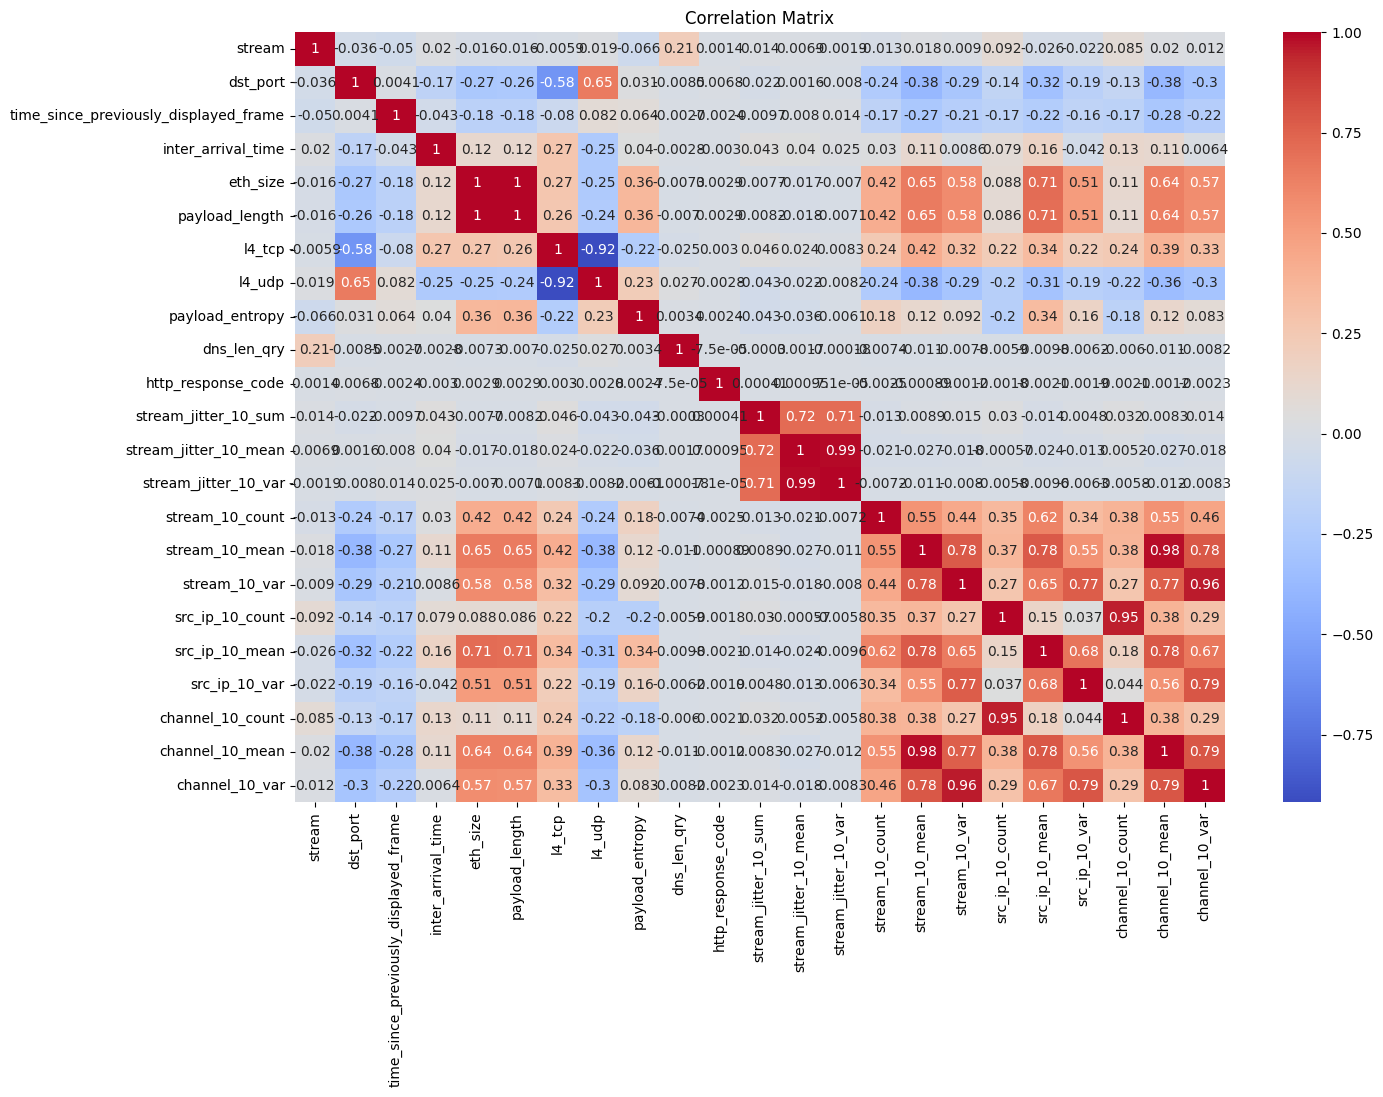

In [7]:
numeric_data = traffic_data.select_dtypes(include=[float, int])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.savefig('plots/Corr1.svg', format='svg')
plt.show()

note: some variables have very high correlations
- find ones that correlate abs above 0.8

In [8]:
correlation_matrix = numeric_data.corr().abs()
high_correlation_pairs = [
    (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(correlation_matrix.columns))
    for j in range(i + 1, len(correlation_matrix.columns))
    if correlation_matrix.iloc[i, j] > 0.8
]

print("Pairs of variables with correlation absolute values above 0.8:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

Pairs of variables with correlation absolute values above 0.8:
eth_size and payload_length: 0.999948259105248
l4_tcp and l4_udp: 0.9187395313382283
stream_jitter_10_mean and stream_jitter_10_var: 0.9904678915837913
stream_10_mean and channel_10_mean: 0.9810088145643975
stream_10_var and channel_10_var: 0.9604703116353204
src_ip_10_count and channel_10_count: 0.9520773429968445


1. Eth_size is the size of the ethernet frame and payload_length is the length of actual data within ethernet frame
    - drop Eth_Size
2. l4_tcp and l4_UDP are both different and both relevant so I'll keep both
3. Stream_Jitter_10_Mean and Stream_Jitter_10_Var: variance provides more info for changes in jitter
    - drop Stream_Jitter_10_Mean
4. Stream_10_Mean and Channel_10_Mean
    - drop channel, avoid redundancy
5. Stream_10_Var and Channel_10_Var: 
    - same as above, drop channel
6. Src_IP_10_Count and Channel_10_Count: source IPs more important for attacks
    - drop channel

In [9]:
traffic_data = traffic_data.drop(columns=['eth_size', 'stream_jitter_10_mean', 'channel_10_mean', 
                   'channel_10_var', 'channel_10_count'])

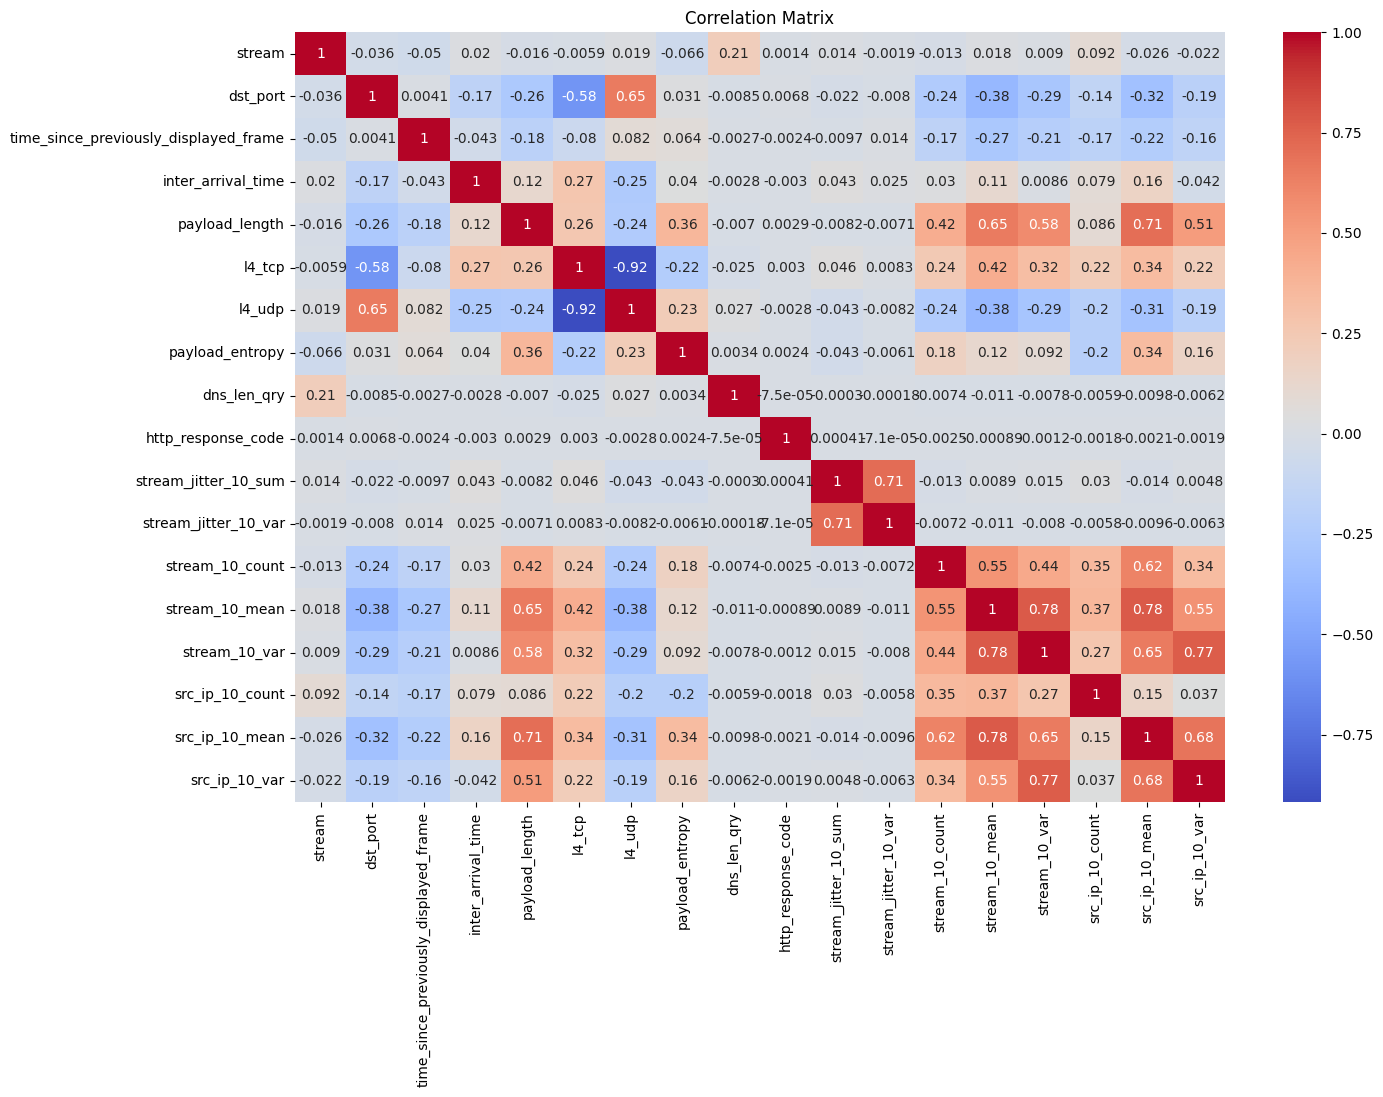

In [10]:
numeric_data = traffic_data.select_dtypes(include=[float, int])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.savefig('plots/Corr2.svg', format='svg')
plt.show()

## Pairplot

In [11]:
print(traffic_data.columns)

Index(['stream', 'user_agent', 'src_mac', 'dst_mac', 'dst_ip', 'dst_port',
       'time_since_previously_displayed_frame', 'inter_arrival_time',
       'payload_length', 'l4_tcp', 'l4_udp', 'payload_entropy', 'user_agent.1',
       'dns_server', 'dns_len_qry', 'http_request_method', 'http_host',
       'http_uri', 'http_response_code', 'stream_jitter_10_sum',
       'stream_jitter_10_var', 'stream_10_count', 'stream_10_mean',
       'stream_10_var', 'src_ip_10_count', 'src_ip_10_mean', 'src_ip_10_var',
       'traffic_type'],
      dtype='object')


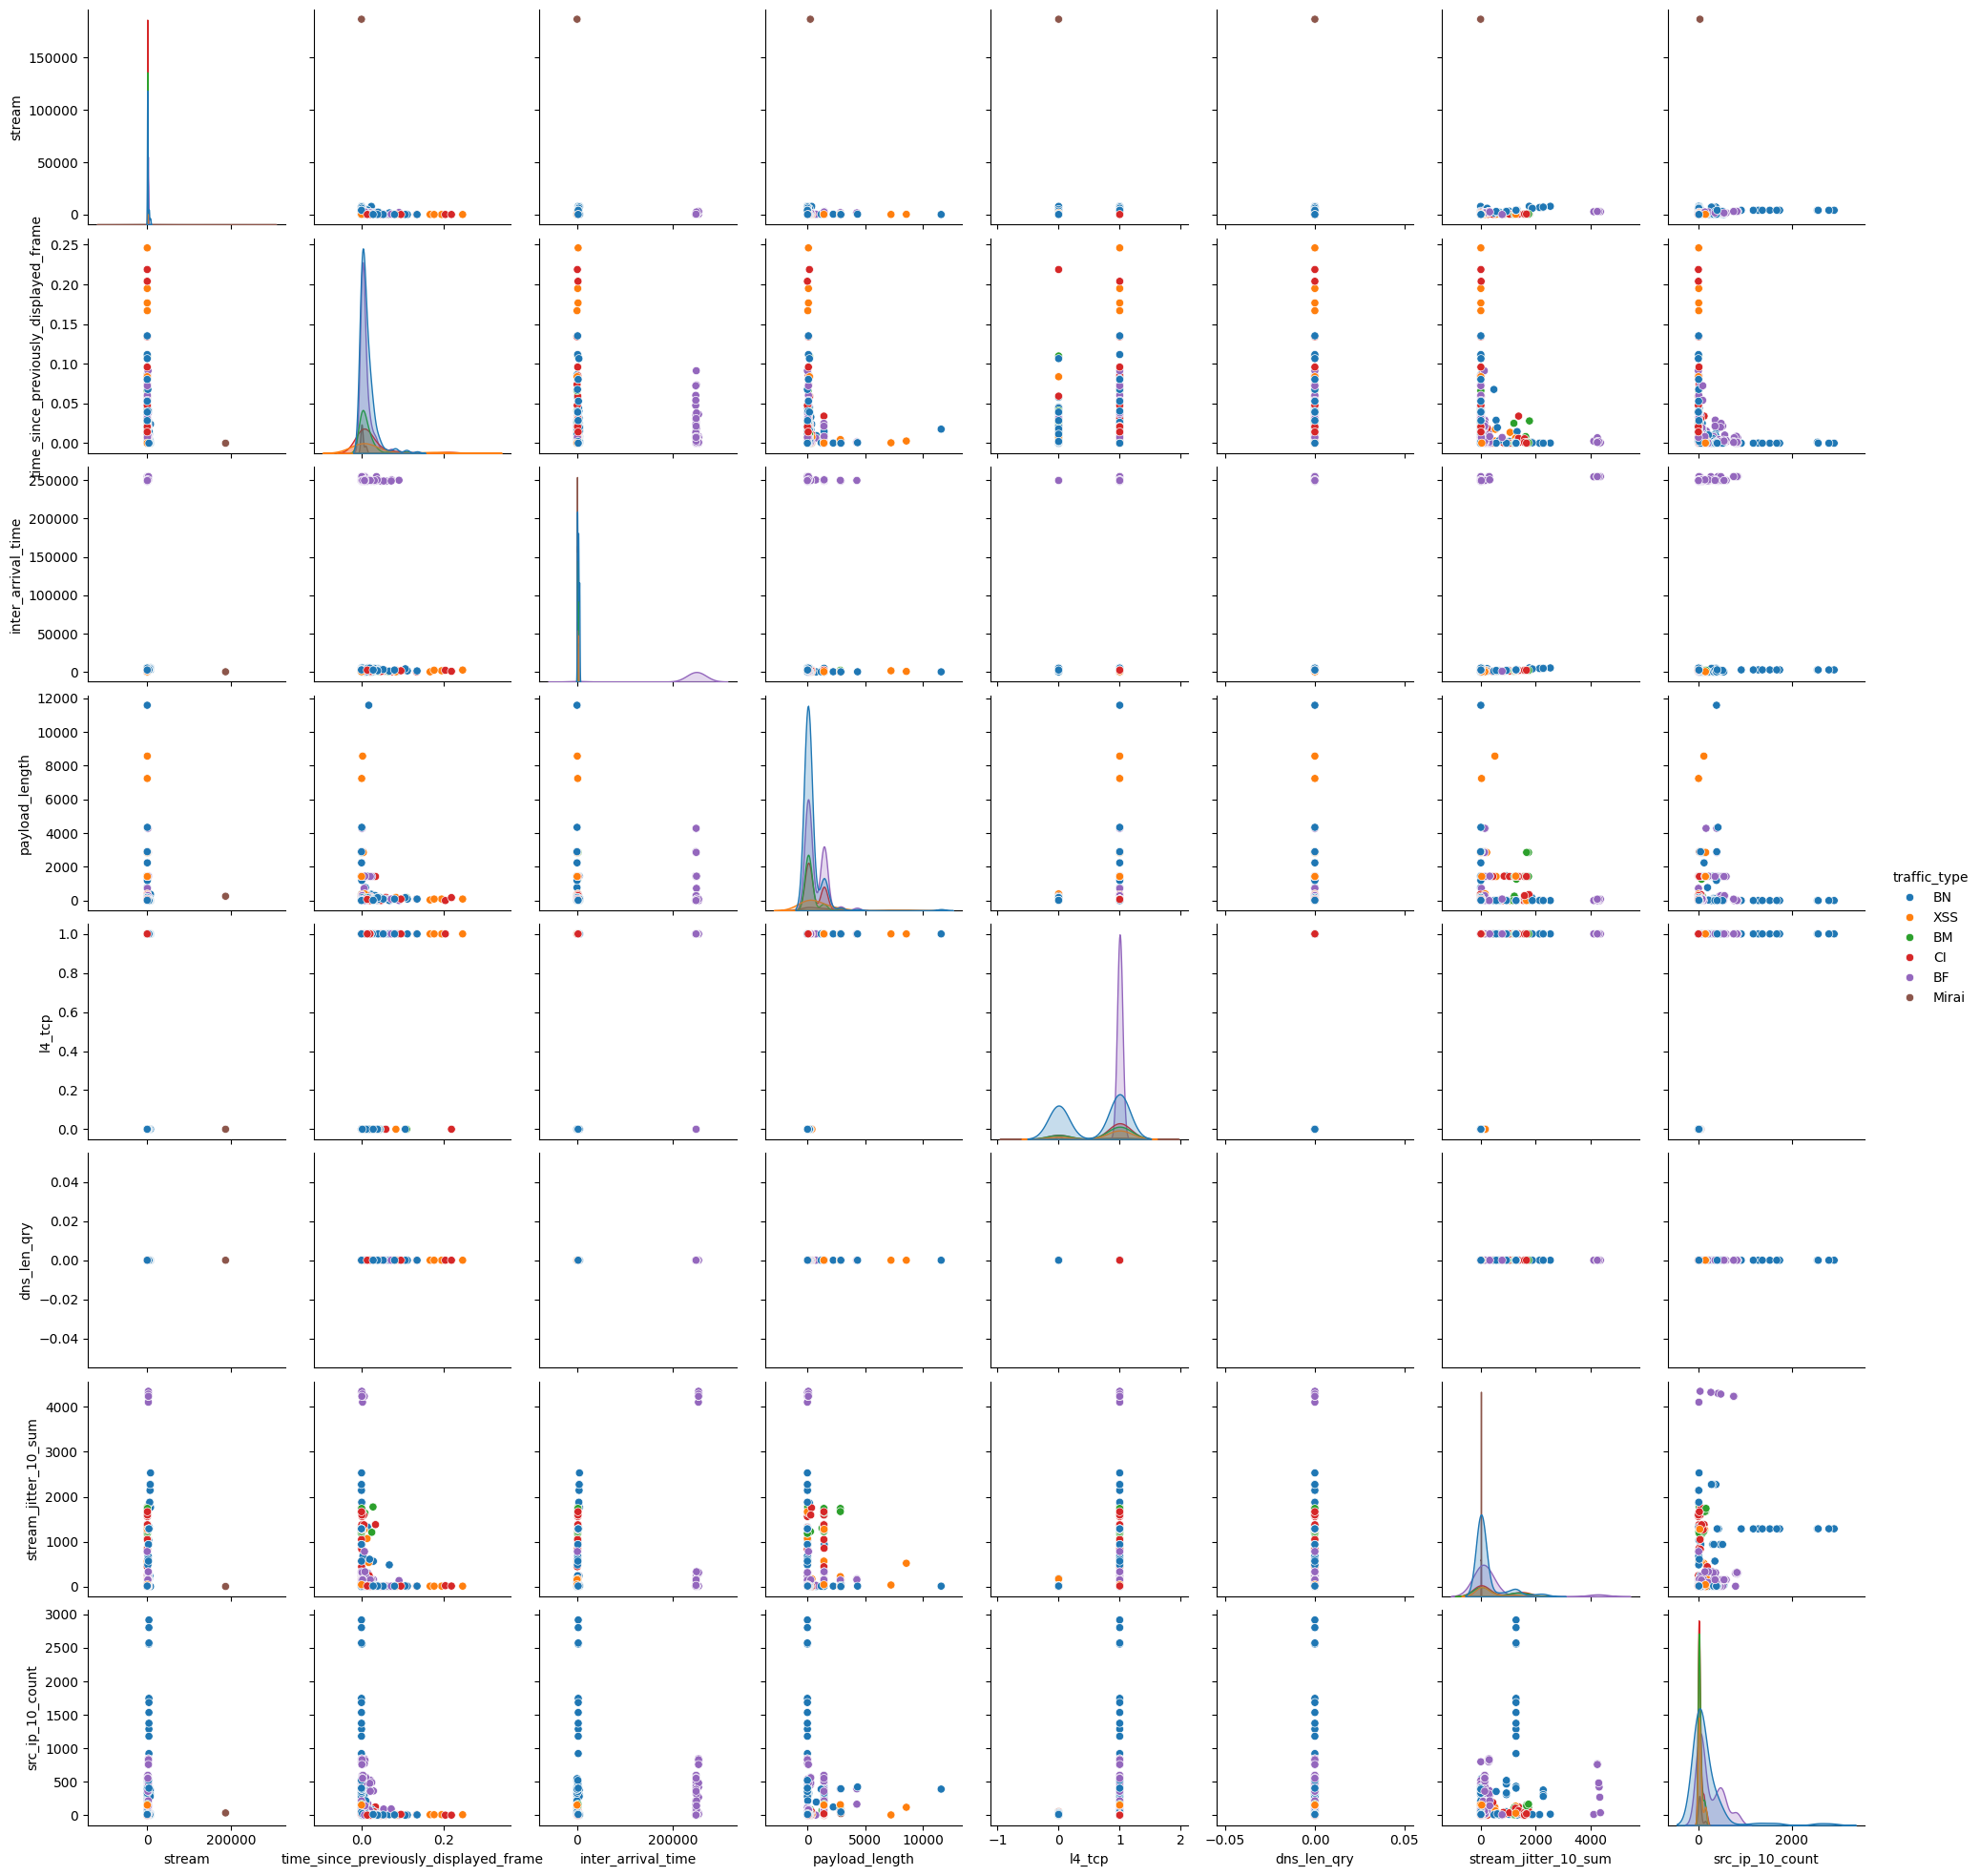

In [12]:
smaller_sample = traffic_data.sample(500)
selected_features = ['stream', 'time_since_previously_displayed_frame', 'inter_arrival_time', 
                     'payload_length', 'l4_tcp', 'dns_len_qry', 
                     'stream_jitter_10_sum', 'src_ip_10_count', 'traffic_type']
sns.pairplot(smaller_sample[selected_features], hue='traffic_type')

plt.savefig('plots/Pairplot.svg', format='svg')
plt.show()

Note: 
- tested on select subset of features I believe are most diverse in data for prediction
- It seems like Brute Force Attacks will be the most easily identifiable, maybe a seperate detection function for BF specifically?

Results:
- try 2 seperate detection models, where one runs before the second
    - quickly filters most detectable attack type, reduce work for second model
    - binary classification for BF only
    - multi-class for all others model
- 1st model: distinguishes between BF and all other types of traffic
    - BF most detectable vs other traffics, highly accurate for BF attacks
    - also of most importance givne my project topic
- 2nd model: assumes there is no BF, doesnt train on BF data, and distinguishes between all other traffic patters
    - model can focus on more subtle differences between the other traffic types since BF is such a difference in traffic patters
    - potential better classification accuracy
- disatvantages:
    - complexity of switching models and ensuring they work together on the side of the implementation party (camera comapnies)
    - may take more time to run
    - false negatives in first model would negatively impact next model bc it is not trained on BF data
    - 2nd model dependent on first

- method: 
    - create one big model
    - assess its accuracy and time complexity compared to the 2-model method

# Step 4: Post EDA Cleaning


## Get Relevant Data

In [13]:
traffic_data.sample(10)

,stream,user_agent,src_mac,dst_mac,dst_ip,dst_port,time_since_previously_displayed_frame,inter_arrival_time,payload_length,l4_tcp,...,http_response_code,stream_jitter_10_sum,stream_jitter_10_var,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,traffic_type
73713,187,none,Amazon Echo Show,3c:18:a0:41:c3:a0,13.225.189.194,443,0.000001,1404.186465,0,1,...,0,78.222639,32.632687,187.0,1111.021390,3.968832e+05,55.0,89.872727,9.928039e+03,BM
5881,225,none,Nest Indoor Camera,3c:18:a0:41:c3:a0,35.186.43.132,443,0.034914,249124.646713,90,1,...,0,10.018395,0.025383,108.0,113.611111,2.936707e+03,54.0,161.000000,1.350000e+03,BF
62554,3,none,Nest Indoor Camera,3c:18:a0:41:c3:a0,35.185.44.250,443,0.002268,2231.334323,90,1,...,0,10.172498,0.218566,21.0,122.952381,2.834648e+03,10.0,156.000000,0.000000e+00,CI
65286,133,none,Netatmo Camera,3c:18:a0:41:c3:a0,51.145.143.28,443,0.000223,232.886140,1428,1,...,0,186.162521,346.231205,99.0,1053.434343,1.426031e+06,63.0,1528.380952,1.513419e+06,XSS
37145,2989,none,Rbcior Camera,3c:18:a0:41:c3:a0,44.231.176.168,443,0.004495,1902.373344,0,1,...,0,952.068703,52399.705259,17.0,313.235294,3.828643e+05,13.0,141.000000,5.153500e+03,BN
67765,-1,none,TP-Link Tapo Camera,3c:18:a0:41:c3:a0,192.168.137.1,0,0.021614,1429.821792,154,0,...,0,10.231980,0.036999,52.0,85.980769,3.137902e+03,8.0,196.000000,2.688000e+03,XSS
38669,1,none,Nest Indoor Camera,3c:18:a0:41:c3:a0,35.185.101.66,443,0.047149,2194.958007,90,1,...,0,11.009489,1.468168,9.0,138.888889,3.549111e+03,4.0,156.000000,0.000000e+00,BN
73607,262,none,Netatmo Camera,3c:18:a0:41:c3:a0,51.145.143.28,443,0.013102,1388.478031,1428,1,...,0,1255.802110,10153.806894,155.0,1046.774194,2.499365e+06,151.0,2024.006623,3.186705e+06,BM
29539,782,none,Amazon Echo Show,3c:18:a0:41:c3:a0,3.237.53.195,443,0.000002,452.485823,0,1,...,0,218.415850,6808.648949,7.0,142.142857,3.780548e+04,35.0,211.771429,3.863436e+04,BN
3231,730,none,Arlo Q Indoor Camera,3c:18:a0:41:c3:a0,52.17.9.172,443,0.000233,248922.883672,1448,1,...,0,76.256919,15.741145,335.0,1253.164179,1.966191e+06,214.0,1914.331776,1.847968e+06,BF


In [14]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76908 entries, 0 to 76907
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   stream                                 76908 non-null  int64  
 1   user_agent                             76908 non-null  object 
 2   src_mac                                76908 non-null  object 
 3   dst_mac                                76908 non-null  object 
 4   dst_ip                                 76908 non-null  object 
 5   dst_port                               76908 non-null  int64  
 6   time_since_previously_displayed_frame  76908 non-null  float64
 7   inter_arrival_time                     76908 non-null  float64
 8   payload_length                         76908 non-null  int64  
 9   l4_tcp                                 76908 non-null  int64  
 10  l4_udp                                 76908 non-null  int64  
 11  pa

In [15]:
model_data = traffic_data[['src_mac',
                           'time_since_previously_displayed_frame', 
                          'inter_arrival_time', 
                          'payload_length', 
                          'payload_entropy', 
                          'dns_server', 
                          'dns_len_qry', 
                          'http_request_method', 
                          'http_uri', 
                          'http_response_code', 
                          'stream_10_count', 
                          'stream_10_mean', 
                          'stream_10_var', 
                          'src_ip_10_count', 
                          'src_ip_10_mean',
                          'src_ip_10_var',
                          'traffic_type']]

In [16]:
model_data.sample(10)

,src_mac,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_request_method,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,traffic_type
62012,HeimVision Smart WiFi Camera,0.010870,2092.431364,176,3.567558,none,0,none,none,0,2.0,218.000000,0.000000,6.0,176.333333,4166.666667,CI
48878,Rbcior Camera,0.011115,3771.692971,188,3.527743,none,0,none,none,0,5.0,190.000000,4012.500000,3.0,230.000000,0.000000,BN
47483,Amazon Echo Show,0.000659,3469.485118,0,0.000000,none,0,none,none,0,2.0,428.500000,262812.500000,37.0,110.918919,26646.743243,BN
69405,Nest Indoor Camera,0.177308,1951.333697,90,3.515414,none,0,none,none,0,23.0,117.826087,3282.877470,12.0,159.166667,2214.878788,XSS
58374,TP-Link Tapo Camera,0.015521,778.920091,154,3.148164,none,0,none,none,0,41.0,142.097561,13936.840244,10.0,163.700000,4281.344444,CI
71451,TP-Link Tapo Camera,0.018392,154.717189,154,3.142746,none,0,none,none,0,36.0,103.416667,7222.764286,7.0,192.000000,2986.666667,BM
51242,Amazon Echo Show,0.001193,4251.972604,0,0.000000,none,0,none,none,0,4.0,150.750000,8394.250000,38.0,138.315789,28575.248933,BN
60215,Nest Indoor Camera,0.013181,1408.790102,90,3.555628,none,0,none,none,0,21.0,122.952381,2834.647619,10.0,156.000000,0.000000,CI
38153,TP-Link Tapo Camera,0.013909,2107.759620,28,2.875410,none,0,none,none,0,2.0,70.000000,0.000000,3.0,70.000000,0.000000,BN
30848,Amazon Echo Show,0.034932,707.644913,16,3.230492,none,0,none,none,0,33.0,61.393939,18.308712,39.0,109.256410,24291.037787,BN


In [17]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76908 entries, 0 to 76907
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   src_mac                                76908 non-null  object 
 1   time_since_previously_displayed_frame  76908 non-null  float64
 2   inter_arrival_time                     76908 non-null  float64
 3   payload_length                         76908 non-null  int64  
 4   payload_entropy                        76908 non-null  float64
 5   dns_server                             76908 non-null  object 
 6   dns_len_qry                            76908 non-null  int64  
 7   http_request_method                    76908 non-null  object 
 8   http_uri                               76908 non-null  object 
 9   http_response_code                     76908 non-null  int64  
 10  stream_10_count                        76908 non-null  float64
 11  st

## Encoding

### http_uri

In [18]:
http_uri_counts = model_data['http_uri'].value_counts()
print(http_uri_counts)

http_uri
none                                                                                                        76872
http://mmechocaptiveportal.com/generate_204                                                                    34
http://xyxcamera.oss-cn-hongkong.aliyuncs.com/AYS-098611-PBLKR/photos/20221007/2022-10-07-14-16-47-2.jpg        1
http://xyxcamera.oss-cn-hongkong.aliyuncs.com/AYS-098611-PBLKR/dates/20221007                                   1
Name: count, dtype: int64


In [19]:
model_data['http_uri'] = model_data['http_uri'].apply(lambda x: 0 if x == 'none' else 1)

C:\Users\Madeline\AppData\Local\Temp\ipykernel_25032\2057615344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['http_uri'] = model_data['http_uri'].apply(lambda x: 0 if x == 'none' else 1)


In [20]:
http_uri_counts = model_data['http_uri'].value_counts()
print(http_uri_counts)

http_uri
0    76872
1       36
Name: count, dtype: int64


### dns_server

In [21]:
dns_server_counts = model_data['dns_server'].value_counts()
print(dns_server_counts)

dns_server
none                                                    76888
meidong2.xyx.wiki                                           5
api.us.xiaoyi.com                                           3
dongjing2.xyx.wiki                                          2
pool.ntp.org                                                2
dns.closeli.com                                             2
use1-relay-i-0d0caa744a3d48723.dcipc.i.tplinknbu.com        1
d1cg7g7aedi1wy.cloudfront.net.mshome.net                    1
avs-alexa-3-na.amazon.com                                   1
ap-gue1.spotify.com                                         1
api.amazonalexa.com                                         1
dcape-na.amazon.com                                         1
Name: count, dtype: int64


In [22]:
model_data['dns_server'] = model_data['dns_server'].apply(lambda x: 0 if x == 'none' else 1)

C:\Users\Madeline\AppData\Local\Temp\ipykernel_25032\3663541790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['dns_server'] = model_data['dns_server'].apply(lambda x: 0 if x == 'none' else 1)


In [23]:
dns_server_counts = model_data['dns_server'].value_counts()
print(dns_server_counts)

dns_server
0    76888
1       20
Name: count, dtype: int64


### http_request_method

In [24]:
http_request_method_counts = model_data['http_request_method'].value_counts()
print(http_request_method_counts)

http_request_method
none    76872
GET        34
PUT         2
Name: count, dtype: int64


In [25]:
model_data = pd.get_dummies(model_data, columns=['http_request_method'], prefix='method')

In [26]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76908 entries, 0 to 76907
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   src_mac                                76908 non-null  object 
 1   time_since_previously_displayed_frame  76908 non-null  float64
 2   inter_arrival_time                     76908 non-null  float64
 3   payload_length                         76908 non-null  int64  
 4   payload_entropy                        76908 non-null  float64
 5   dns_server                             76908 non-null  int64  
 6   dns_len_qry                            76908 non-null  int64  
 7   http_uri                               76908 non-null  int64  
 8   http_response_code                     76908 non-null  int64  
 9   stream_10_count                        76908 non-null  float64
 10  stream_10_mean                         76908 non-null  float64
 11  st

### Results
- http_uri encoded as 
    - 0 for no URI request 
    - 1 for any URI request
- same for dns_server
- one-hot encoding for HTTP request method
    - method_get, put, or none


## Standardization

In [27]:
model_data.sample(5, random_state=5)


,src_mac,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,traffic_type,method_GET,method_PUT,method_none
35339,Nest Indoor Camera,0.231977,1640.980540,90,3.565458,0,0,0,0,11.0,133.818182,3.371564e+03,5.0,156.000000,0.000000,BN,False,False,True
56549,Wyze Camera,0.000472,67.893796,48,3.522414,0,0,0,0,2.0,75.000000,4.500000e+02,58.0,172.103448,81522.796128,CI,False,False,True
56200,Amazon Echo Show,0.000004,40.258113,28,3.204135,0,0,0,0,53.0,84.037736,1.929306e+03,8.0,70.375000,36.553571,CI,False,False,True
16068,Arlo Q Indoor Camera,0.000261,250262.147868,1448,3.584559,0,0,0,0,385.0,1094.779221,1.140666e+06,248.0,1654.399194,873102.896680,BF,False,False,True
73218,Wyze Camera,0.066083,1346.267128,0,0.000000,0,0,0,0,14.0,361.142857,2.720344e+05,27.0,98.037037,10135.729345,BM,False,False,True


In [28]:
model_data.describe()

,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var
count,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,76908.000000,7.690800e+04,76908.000000,76908.000000,7.690800e+04
mean,0.016373,64218.276345,486.880520,2.499096,0.000260,0.005201,0.000468,0.005201,92.313699,422.450995,4.783988e+05,155.865047,517.359611,4.153006e+05
std,0.032154,107794.590591,925.906594,1.532687,0.016124,0.355288,0.021631,1.019897,176.327486,430.556395,8.851598e+05,361.919431,627.781483,9.750289e+05
min,0.000000,0.000269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,0.000000e+00,2.000000,43.000000,0.000000e+00
25%,0.000542,842.736504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,92.497984,2.345000e+02,9.000000,112.695350,1.355636e+03
50%,0.004747,2155.890025,90.000000,3.501245,0.000000,0.000000,0.000000,0.000000,21.000000,161.200000,5.954167e+03,26.000000,161.400000,2.392885e+04
75%,0.018668,248619.560974,610.000000,3.579725,0.000000,0.000000,0.000000,0.000000,90.000000,874.545455,6.514431e+05,110.000000,918.334842,3.150453e+05
max,0.663133,254640.021240,30408.000000,3.584941,1.000000,52.000000,1.000000,200.000000,1224.000000,4574.500000,3.493644e+07,3022.000000,2761.083333,2.355040e+07


In [29]:
numerical_columns = model_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
model_data[numerical_columns] = scaler.fit_transform(model_data[numerical_columns])

In [30]:
model_data.sample(5, random_state=5)

,src_mac,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,traffic_type,method_GET,method_PUT,method_none
35339,Nest Indoor Camera,6.705309,-0.580527,-0.428643,0.695751,-0.016128,-0.014639,-0.02164,-0.0051,-0.461155,-0.670376,-0.536661,-0.416850,-0.575617,-0.425939,BN,False,False,True
56549,Wyze Camera,-0.494512,-0.595121,-0.474004,0.667667,-0.016128,-0.014639,-0.02164,-0.0051,-0.512196,-0.806987,-0.539961,-0.270407,-0.549966,-0.342328,CI,False,False,True
56200,Amazon Echo Show,-0.509067,-0.595377,-0.495605,0.460005,-0.016128,-0.014639,-0.02164,-0.0051,-0.222960,-0.785996,-0.538290,-0.408561,-0.712011,-0.425902,CI,False,False,True
16068,Arlo Q Indoor Camera,-0.501075,1.725922,1.038037,0.708214,-0.016128,-0.014639,-0.02164,-0.0051,1.659913,1.561544,0.748194,0.254575,1.811215,0.469530,BF,False,False,True
73218,Wyze Camera,1.545994,-0.583261,-0.525845,-1.630544,-0.016128,-0.014639,-0.02164,-0.0051,-0.444141,-0.142394,-0.233140,-0.356062,-0.667948,-0.415544,BM,False,False,True


In [31]:
model_data.describe()

,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var
count,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,76908.000000,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04,7.690800e+04
mean,-5.765053e-17,2.365150e-17,-7.816081e-17,-4.257270e-16,0.000000,5.728097e-18,-5.589514e-18,-3.972713e-18,1.921684e-17,-8.869312e-18,-9.238866e-18,-5.912874e-18,2.235806e-17,2.660794e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-5.091917e-01,-5.957506e-01,-5.258454e-01,-1.630544e+00,-0.016128,-1.463899e-02,-2.164049e-02,-5.099586e-03,-5.121963e-01,-8.813095e-01,-5.404696e-01,-4.251390e-01,-7.556175e-01,-4.259395e-01
25%,-4.923355e-01,-5.879326e-01,-5.258454e-01,-1.630544e+00,-0.016128,-1.463899e-02,-2.164049e-02,-5.099586e-03,-4.838398e-01,-7.663460e-01,-5.402047e-01,-4.057975e-01,-6.445983e-01,-4.245491e-01
50%,-3.615597e-01,-5.757505e-01,-4.286427e-01,6.538550e-01,-0.016128,-1.463899e-02,-2.164049e-02,-5.099586e-03,-4.044416e-01,-6.067793e-01,-5.337429e-01,-3.588254e-01,-5.670156e-01,-4.013976e-01
75%,7.139218e-02,1.710684e+00,1.329727e-01,7.050598e-01,-0.016128,-1.463899e-02,-2.164049e-02,-5.099586e-03,-1.312169e-02,1.050031e+00,1.954963e-01,-1.267281e-01,6.387220e-01,-1.028236e-01
max,2.011429e+01,1.766536e+00,3.231569e+01,7.084630e-01,62.003226,1.463466e+02,4.620967e+01,1.960944e+02,6.418135e+00,9.643513e+00,3.892887e+01,7.919314e+00,3.574075e+00,2.372775e+01


### Results
- all numeric variables, including binary encoded ones, were standardized to have a mean of 0 and a standard deviation of 1

# Step 5: Whole Model Data

## Split Data

In [32]:
X = model_data.drop(columns=['traffic_type'])
y = model_data['traffic_type']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 46144 samples
Validation set size: 15382 samples
Test set size: 15382 samples


In [33]:
X_train.drop(columns=['src_mac'], inplace=True)
X_val.drop(columns=['src_mac'], inplace=True)



## Save Data

In [34]:
X_train.to_csv('data/models/X_train.csv', index=False)
y_train.to_csv('data/models/y_train.csv', index=False)
X_val.to_csv('data/models/X_val.csv', index=False)
y_val.to_csv('data/models/y_val.csv', index=False)
X_test.to_csv('data/models/X_test.csv', index=False)
y_test.to_csv('data/models/y_test.csv', index=False)


# Step 6: 2-Model Data
- use above data for model 1
- model 2 drops all BF points

In [35]:
# drop rows where traffic type is BF
m2_data = model_data[model_data['traffic_type'] != 'BF']



In [36]:
m2_data.sample(5)

,src_mac,time_since_previously_displayed_frame,inter_arrival_time,payload_length,payload_entropy,dns_server,dns_len_qry,http_uri,http_response_code,stream_10_count,stream_10_mean,stream_10_var,src_ip_10_count,src_ip_10_mean,src_ip_10_var,traffic_type,method_GET,method_PUT,method_none
52010,Nest Indoor Camera,-0.231406,-0.554951,-0.428643,0.687876,-0.016128,-0.014639,-0.02164,-0.0051,-0.421455,-0.698857,-0.537118,-0.408561,-0.593538,-0.424901,BN,False,False,True
35416,Nest Indoor Camera,1.228805,-0.580353,-0.290399,0.701728,-0.016128,-0.014639,-0.02164,-0.0051,-0.404442,-0.683226,-0.535943,-0.403034,-0.569564,-0.423166,BN,False,False,True
60017,TP-Link Tapo Camera,0.039071,-0.584238,-0.359521,0.430768,-0.016128,-0.014639,-0.02164,-0.0051,-0.194603,-0.745358,-0.534944,-0.411324,-0.518272,-0.422876,CI,False,False,True
55204,Amazon Echo Show,0.249277,-0.549252,-0.508565,0.558748,-0.016128,-0.014639,-0.02164,-0.0051,-0.432798,-0.836019,-0.540431,-0.389219,-0.641671,-0.389834,BN,False,False,True
27080,TP-Link Tapo Camera,-0.294321,-0.594560,-0.495605,0.104613,-0.016128,-0.014639,-0.02164,-0.0051,-0.483840,-0.818600,-0.540470,-0.400271,-0.712609,-0.425939,BN,False,False,True


In [37]:
X = m2_data.drop(columns=['traffic_type'])
y = m2_data['traffic_type']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 33813 samples
Validation set size: 11271 samples
Test set size: 11272 samples


In [38]:
X_train.drop(columns=['src_mac'], inplace=True)
X_val.drop(columns=['src_mac'], inplace=True)

In [39]:
X_train.to_csv('data/models/X_train2.csv', index=False)
y_train.to_csv('data/models/y_train2.csv', index=False)
X_val.to_csv('data/models/X_val2.csv', index=False)
y_val.to_csv('data/models/y_val2.csv', index=False)
X_test.to_csv('data/models/X_test2.csv', index=False)
y_test.to_csv('data/models/y_test2.csv', index=False)